In [435]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [7]:
data = pd.read_csv('data_hackathon_v04.csv',sep='|')
data.head()

,ride_id,created_at,pickup_lat,pickup_lng,dropoff_lat,dropoff_lng,user_id,driver_id,ride_distance,canceled_by_client,canceled_by_driver,ride_to_suburb
0,000002b3a3014388a6c62fdda1d03de1n,2018-12-14 23:00:00.043000000,49.824671,24.013246,49.784729,24.060303,3900450045004500300042003700310037003800460031...,a429c637c1244bb7a1d606d2b9987bdd,7.97,0,0,0
1,000013de085e4be4a2cd27d9112f7bdbn,2018-10-13 23:59:00.580000000,49.837906,24.029772,49.841217,23.974363,6227785C7862375C7863623F5C7866652E285F2D5C7861...,NaN,5.62,1,0,0
2,000040911549444d8ad461c69370e883n,2018-08-25 21:40:52.537000000,49.839718,23.994425,49.840610,24.029135,62277C6C5C7866386C572C795C7838315C7831645C7863...,7323767ede0349d1a7bfe743a091d63c,3.17,0,0,0
3,0000759fc38a410e8d8802610800ccacn,2018-12-08 13:43:41.357000000,49.829708,24.044172,49.869137,24.010246,62275C7864335C78393135635C6E5C7830355C7839645C...,NaN,5.87,1,0,0
4,0000e61e5282484d943291df7266ee33n,2019-01-18 09:18:44.377000000,49.837013,24.034357,49.832710,23.999216,3300360037004600420041003600300032003500410033...,2913413c2bf748d7932d1d587c8aef13,3.39,0,0,0


Text(0, 0.5, 'Number_calls')

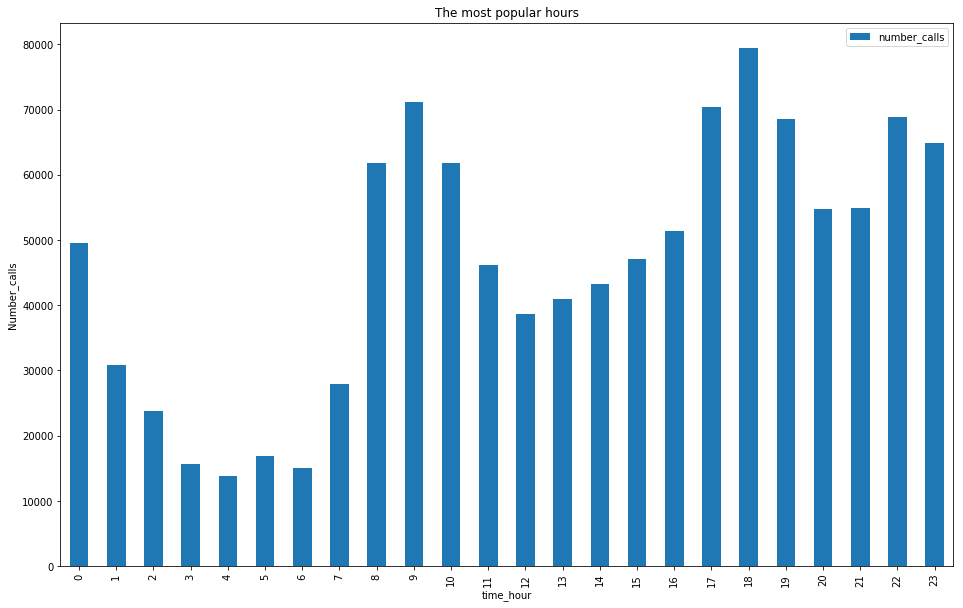

In [9]:
import seaborn as sns
data['created_at'] = pd.to_datetime(data['created_at'])
commutes = data['created_at'].dt.hour.value_counts().to_frame()

dff = pd.DataFrame({'time_hour':commutes.index,'number_calls':commutes.created_at})
dff = dff.sort_values('time_hour',ascending=True)
dff.plot(x="time_hour", y=["number_calls"],figsize = (16,10), kind="bar")
plt.title('The most popular hours')
plt.ylabel('Number_calls')


(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([-10.        ,  -9.7979798 ,  -9.5959596 ,  -9.39393939,
         -9.19191919,  -8.98989899,  -8.78787879,  -8.58585859,
         -8.38383838,  -8.18181818,  -7.97979798,  -7.77777778,
         -7.57575758,  -7.37373737,  -7.17171717,  -6.96969697,
         -6.76767677,  -6.56565657,  -6.36363636,  -6.16161616,
         -5.95959596,  -5.75757576,  -5.55555556,  -5.35353535,
         -5.15151515,  -4.94949495,  -4.74747475,  -4.54545455,
         -4.34343434,  -4.14141414,  -3.93939394,  -3.73737374,
         -3.53535354,  -3.33333333,  -3.13

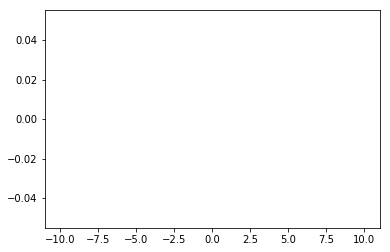

In [430]:
cbc = data.groupby(['driver_id'])['canceled_by_client'].apply(len).to_frame().sort_values('canceled_by_client')
plt.hist(cbc[cbc['canceled_by_client']>500]['canceled_by_client'],bins,alpha = 0.8)


In [11]:
# data.groupby(['user_id'])['canceled_by_driver'].apply(len).to_frame().sort_values('canceled_by_driver')


In [13]:
data['coordinate_from'] = data.apply(lambda x: [x['pickup_lat']] + [x['pickup_lng']] , axis=1)
data['coordinate_to'] = data.apply(lambda x: [x['dropoff_lat']] + [x['dropoff_lng']] , axis=1)
data.head()


,ride_id,created_at,pickup_lat,pickup_lng,dropoff_lat,dropoff_lng,user_id,driver_id,ride_distance,canceled_by_client,canceled_by_driver,ride_to_suburb,creates_at,coordinate_from,coordinate_to
0,000002b3a3014388a6c62fdda1d03de1n,2018-12-14 23:00:00.043,49.824671,24.013246,49.784729,24.060303,3900450045004500300042003700310037003800460031...,a429c637c1244bb7a1d606d2b9987bdd,7.97,0,0,0,2018-12-14 23:00:00.043,"[49.82467065, 24.01324558]","[49.784729, 24.06030273]"
1,000013de085e4be4a2cd27d9112f7bdbn,2018-10-13 23:59:00.580,49.837906,24.029772,49.841217,23.974363,6227785C7862375C7863623F5C7866652E285F2D5C7861...,NaN,5.62,1,0,0,2018-10-13 23:59:00.580,"[49.83790588, 24.0297718]","[49.84121704, 23.97436332]"
2,000040911549444d8ad461c69370e883n,2018-08-25 21:40:52.537,49.839718,23.994425,49.840610,24.029135,62277C6C5C7866386C572C795C7838315C7831645C7863...,7323767ede0349d1a7bfe743a091d63c,3.17,0,0,0,2018-08-25 21:40:52.537,"[49.83971786, 23.99442481]","[49.8406105, 24.02913475]"
3,0000759fc38a410e8d8802610800ccacn,2018-12-08 13:43:41.357,49.829708,24.044172,49.869137,24.010246,62275C7864335C78393135635C6E5C7830355C7839645C...,NaN,5.87,1,0,0,2018-12-08 13:43:41.357,"[49.82970809, 24.04417228]","[49.86913681, 24.01024627]"
4,0000e61e5282484d943291df7266ee33n,2019-01-18 09:18:44.377,49.837013,24.034357,49.832710,23.999216,3300360037004600420041003600300032003500410033...,2913413c2bf748d7932d1d587c8aef13,3.39,0,0,0,2019-01-18 09:18:44.377,"[49.83701324, 24.03435707]","[49.83271026, 23.99921607]"


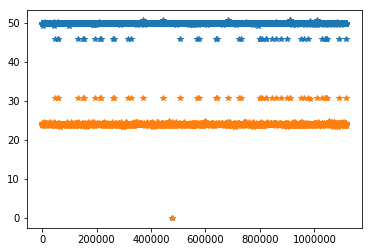

In [33]:
plt.plot(data['pickup_lat'],'*')
plt.plot(data['pickup_lng'],'*')

In [43]:
data = data[data['pickup_lng']<24.3]
data = data[data['pickup_lng']!=0]

In [44]:
np.unique(data['coordinate_from']).size

74148

In [45]:
X = np.array(data['coordinate_from'].tolist())
k_m_dens = KMeans(n_clusters = 100, random_state=1).fit(X)
data['labels_by_density'] = k_m_dens.predict(X)
data['new_coordinate_by_dens'] = k_m_dens.labels_

In [52]:
del data['new_coordinate_by_dens']
test1 = pd.DataFrame(index = [i for i in range(100)])
test1['labels_by_density'] = [i for i in range(100)]
new_coordinate_lat = [i[0] for i in k_m_dens.cluster_centers_ ]
new_coordinate_lon = [i[1] for i in k_m_dens.cluster_centers_ ]
test1['new_coordinate_lat'] = new_coordinate_lat
test1['new_coordinate_lon'] = new_coordinate_lon
test1['new_coordinate_by_dens'] = test1.apply(lambda x: [x['new_coordinate_lat']] + [x['new_coordinate_lon']] , axis=1)
del test1['new_coordinate_lat'], test1['new_coordinate_lon']
test1.head()

,labels_by_density,new_coordinate_by_dens
0,0,"[49.819061259707496, 24.003143096248056]"
1,1,"[49.83203425287154, 24.017942384573523]"
2,2,"[49.79633886884069, 24.06358745185933]"
3,3,"[49.82404826582329, 23.899542374538154]"
4,4,"[49.8553641169671, 24.029633224977122]"


In [53]:
df = pd.merge(data,test1, how='left', on='labels_by_density')
df.head()

,ride_id,created_at,pickup_lat,pickup_lng,dropoff_lat,dropoff_lng,user_id,driver_id,ride_distance,canceled_by_client,canceled_by_driver,ride_to_suburb,creates_at,coordinate_from,coordinate_to,labels_by_density,new_coordinate_by_dens
0,000002b3a3014388a6c62fdda1d03de1n,2018-12-14 23:00:00.043,49.824671,24.013246,49.784729,24.060303,3900450045004500300042003700310037003800460031...,a429c637c1244bb7a1d606d2b9987bdd,7.97,0,0,0,2018-12-14 23:00:00.043,"[49.82467065, 24.01324558]","[49.784729, 24.06030273]",49,"[49.82201177520198, 24.013996980712]"
1,000013de085e4be4a2cd27d9112f7bdbn,2018-10-13 23:59:00.580,49.837906,24.029772,49.841217,23.974363,6227785C7862375C7863623F5C7866652E285F2D5C7861...,NaN,5.62,1,0,0,2018-10-13 23:59:00.580,"[49.83790588, 24.0297718]","[49.84121704, 23.97436332]",43,"[49.83821222818285, 24.031521094445523]"
2,000040911549444d8ad461c69370e883n,2018-08-25 21:40:52.537,49.839718,23.994425,49.840610,24.029135,62277C6C5C7866386C572C795C7838315C7831645C7863...,7323767ede0349d1a7bfe743a091d63c,3.17,0,0,0,2018-08-25 21:40:52.537,"[49.83971786, 23.99442481]","[49.8406105, 24.02913475]",10,"[49.83901199512102, 23.994690441992052]"
3,0000759fc38a410e8d8802610800ccacn,2018-12-08 13:43:41.357,49.829708,24.044172,49.869137,24.010246,62275C7864335C78393135635C6E5C7830355C7839645C...,NaN,5.87,1,0,0,2018-12-08 13:43:41.357,"[49.82970809, 24.04417228]","[49.86913681, 24.01024627]",60,"[49.8281512080706, 24.041817552224003]"
4,0000e61e5282484d943291df7266ee33n,2019-01-18 09:18:44.377,49.837013,24.034357,49.832710,23.999216,3300360037004600420041003600300032003500410033...,2913413c2bf748d7932d1d587c8aef13,3.39,0,0,0,2019-01-18 09:18:44.377,"[49.83701324, 24.03435707]","[49.83271026, 23.99921607]",43,"[49.83821222818285, 24.031521094445523]"


Text(0, 0.5, 'Number_calls')

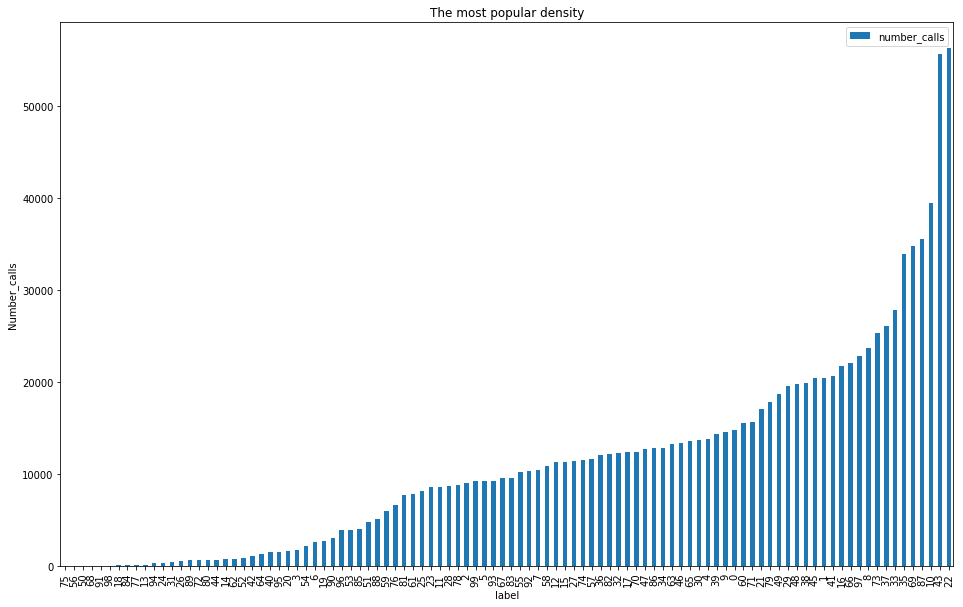

In [433]:
commutes = df.groupby(['labels_by_density'])['ride_id'].apply(len).sort_values().to_frame()

dff = pd.DataFrame({'label':commutes.index,'number_calls':commutes.ride_id})
dff = dff.sort_values('number_calls',ascending=True)
dff.plot(x="label", y=["number_calls"],figsize = (16,10), kind="bar")
plt.title('The most popular density')
plt.ylabel('Number_calls')


In [64]:
df['hours'] = df['creates_at'].apply(lambda x:x.hour)

In [72]:
np.unique(df['new_coordinate_by_dens']).size

100

In [436]:
df = pd.read_csv('max.csv')

In [450]:
df['new_coordinate_by_dens']

0              [49.82201177520198, 24.013996980712]
1           [49.83821222818285, 24.031521094445523]
2           [49.83901199512102, 23.994690441992052]
3            [49.8281512080706, 24.041817552224003]
4           [49.83821222818285, 24.031521094445523]
5            [49.87108890442078, 23.94994364764763]
6          [49.783570308046706, 24.053845293036936]
7            [49.79633886884069, 24.06358745185933]
8          [49.845566271579585, 24.025266771138963]
9           [49.84207085313449, 23.974195830130288]
10          [49.81049482474452, 24.017466537897576]
11          [49.81049482474452, 24.017466537897576]
12          [49.83203425287154, 24.017942384573523]
13             [49.79195348577621, 24.070266609964]
14          [49.79451249115865, 24.055766275068976]
15           [49.840676922400874, 24.0268252030703]
16          [49.83901199512102, 23.994690441992052]
17          [49.84049920248502, 24.019715419479567]
18          [49.86481773241705, 24.012418979179838]
19          

In [454]:
import ast
df['new_coordinate_by_dens'] = df['new_coordinate_by_dens'].apply(lambda x:ast.literal_eval(x))

In [455]:
import folium 
from folium import FeatureGroup, LayerControl, Map, Marker
from folium.plugins import HeatMap
from folium.plugins import MarkerCluster
from folium.plugins import TimeSliderChoropleth
u =[]
m = folium.Map([49.82897427062883, 24.03184984550334], tiles='Stamen Terrain', zoom_start=12)

times = [i for i in range(24)]
feature_group=[]
for i in times:
    unique_data = df[df['hours'] == i]['new_coordinate_by_dens'].tolist()
    feature_group = FeatureGroup(name = i).add_to(m)
    m.add_child(HeatMap(unique_data,name=i,radius=15))
folium.LayerControl(collapsed=True).add_to(m)
m.save('test1.html')


In [453]:
unique_data = df[df['hours'] == 10]['new_coordinate_by_dens'].tolist()
unique_data

['[49.8739781277847, 24.038515090905157]',
 '[49.8313600085907, 24.008927928547575]',
 '[49.824695947200794, 23.961426340352492]',
 '[49.8281512080706, 24.041817552224003]',
 '[49.84207085313449, 23.974195830130288]',
 '[49.783570308046706, 24.053845293036936]',
 '[49.86450806014218, 24.051376282358085]',
 '[49.8281512080706, 24.041817552224003]',
 '[49.824695947200794, 23.961426340352492]',
 '[49.84487865682841, 23.964016091035198]',
 '[49.86481773241705, 24.012418979179838]',
 '[49.83445851377352, 24.038158773182897]',
 '[49.845566271579585, 24.025266771138963]',
 '[49.82767555343874, 23.97064828303291]',
 '[49.83901199512102, 23.994690441992052]',
 '[49.80233645026004, 23.990793007957134]',
 '[49.82897427062883, 24.03184984550334]',
 '[49.819061259707496, 24.003143096248056]',
 '[49.77453630017343, 24.011968026358872]',
 '[49.82825771621946, 23.992300134448413]',
 '[49.845566271579585, 24.025266771138963]',
 '[49.8739781277847, 24.038515090905157]',
 '[49.850136447410584, 24.0223250

In [85]:
df.columns

Index(['ride_id', 'created_at', 'pickup_lat', 'pickup_lng', 'dropoff_lat',
       'dropoff_lng', 'user_id', 'driver_id', 'ride_distance',
       'canceled_by_client', 'canceled_by_driver', 'ride_to_suburb',
       'creates_at', 'coordinate_from', 'coordinate_to', 'labels_by_density',
       'new_coordinate_by_dens', 'hours'],
      dtype='object')

In [91]:
df['time'] = df['created_at'].map(lambda x: pd.to_datetime(str(x)[:13]))

In [93]:
df.groupby(['time','labels_by_density'])['ride_id'].apply(len).reset_index()

,time,labels_by_density,ride_id
0,2018-08-21 00:00:00,0,3
1,2018-08-21 00:00:00,1,2
2,2018-08-21 00:00:00,2,1
3,2018-08-21 00:00:00,4,2
4,2018-08-21 00:00:00,7,1
5,2018-08-21 00:00:00,8,1
6,2018-08-21 00:00:00,9,2
7,2018-08-21 00:00:00,10,3
8,2018-08-21 00:00:00,11,2
9,2018-08-21 00:00:00,12,2


In [111]:
cancel = df[df['canceled_by_driver']==1].groupby(['labels_by_density'])['ride_id'].apply(len).reset_index()
no_cancel = df[df['canceled_by_driver']==0].groupby(['labels_by_density'])['ride_id'].apply(len).reset_index()
stat_cancel = pd.merge(cancel,no_cancel,how='left',on ='labels_by_density')
stat_cancel['percent_no_success'] = stat_cancel['ride_id_x']/stat_cancel['ride_id_y']*100
stat_cancel['percent_no_success'].describe()

count    87.000000
mean      0.240606
std       0.478476
min       0.051787
25%       0.131617
50%       0.167856
75%       0.220733
max       4.545455
Name: percent_no_success, dtype: float64

In [117]:
cancel = df[df['canceled_by_driver']==1].groupby(['labels_by_density','time'])['ride_id'].apply(len).reset_index()
cancel.groupby(['time'])['labels_by_density'].apply(len).argmax()

C:\Users\Admin\Miniconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  


Timestamp('2019-01-01 05:00:00')

In [149]:
start = clusters[0].index.min()
end = clusters[0].index.max()
df['per_hour'] = df['created_at'].map(lambda x: pd.to_datetime(str(x)[:13]))
clusters = df.groupby(['labels_by_density', 'per_hour'])['ride_id'].count()
new_cluster = []
for cluster in clusters.index.get_level_values(0).unique():
    new = pd.Series(index = pd.date_range(start,end, freq='H'), data = 0)
    new[new.index.isin(clusters[cluster].index)] = clusters[cluster]
    new_cluster.append(new)
new_cluster

[2018-08-21 00:00:00     3
 2018-08-21 01:00:00     0
 2018-08-21 02:00:00     0
 2018-08-21 03:00:00     0
 2018-08-21 04:00:00     0
 2018-08-21 05:00:00     4
 2018-08-21 06:00:00     1
 2018-08-21 07:00:00     1
 2018-08-21 08:00:00     4
 2018-08-21 09:00:00    11
 2018-08-21 10:00:00    10
 2018-08-21 11:00:00     4
 2018-08-21 12:00:00     1
 2018-08-21 13:00:00     2
 2018-08-21 14:00:00     3
 2018-08-21 15:00:00     2
 2018-08-21 16:00:00     2
 2018-08-21 17:00:00     2
 2018-08-21 18:00:00     1
 2018-08-21 19:00:00     5
 2018-08-21 20:00:00     3
 2018-08-21 21:00:00     3
 2018-08-21 22:00:00     4
 2018-08-21 23:00:00     1
 2018-08-22 00:00:00     0
 2018-08-22 01:00:00     0
 2018-08-22 02:00:00     0
 2018-08-22 03:00:00     0
 2018-08-22 04:00:00     1
 2018-08-22 05:00:00     4
                        ..
 2019-02-20 10:00:00     7
 2019-02-20 11:00:00     6
 2019-02-20 12:00:00     5
 2019-02-20 13:00:00     5
 2019-02-20 14:00:00     2
 2019-02-20 15:00:00     2
 

# Take_main_features

In [170]:
my_data = pd.DataFrame(new_cluster[0]).reset_index()
my_data.columns = ['date','freq']
my_data['day_name'] = my_data['date'].apply(lambda x: x.day_name())
my_data['binary_day'] = my_data['day_name'].map({'Monday':0, 'Tuesday': 0,'Wednesday':0,'Thursday':0,'Friday':0, 'Saturaday': 1,'Sunday':1})
my_data['binary_day'].value_counts()


0.0    3184
1.0     624
Name: binary_day, dtype: int64

In [173]:
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import pandas as pd
from keras.models import load_model
import numpy as np

Using TensorFlow backend.


In [297]:
def create_dataset(dataset, window_size = 169):
    data_X, data_Y = [], []
    for i in range(len(dataset) - window_size - 1):
        a = dataset[i:(i + window_size), 0]
        data_X.append(a)
        data_Y.append(dataset[i + window_size, 0])
    return(np.array(data_X), np.array(data_Y))

In [ ]:
def fit_model(train_X, train_Y, window_size = 169):
    model = Sequential()
    
    model.add(LSTM(4, 
                   input_shape = (1, window_size)))
    model.add(Dense(1))
    model.compile(loss = "mean_squared_error", 
                  optimizer = "adam")
    model.fit(train_X, 
              train_Y, 
              epochs = 100, 
              batch_size = 1, 
              verbose = 2)
    
    return(model)

In [299]:
my_data

,index,0
0,2018-08-21 00:00:00,3
1,2018-08-21 01:00:00,0
2,2018-08-21 02:00:00,0
3,2018-08-21 03:00:00,0
4,2018-08-21 04:00:00,0
5,2018-08-21 05:00:00,4
6,2018-08-21 06:00:00,1
7,2018-08-21 07:00:00,1
8,2018-08-21 08:00:00,4
9,2018-08-21 09:00:00,11


In [ ]:
rmse = []

for i in range(100):
    my_data = pd.DataFrame(new_cluster[i]).reset_index()
    my_data.columns = ['date','freq']
    data_raw = my_data['freq'].values.astype('float32').reshape(-1,1)
    scaler = MinMaxScaler(feature_range = (0, 1))
    dataset = scaler.fit_transform(data_raw)
    
    # Create test and training sets for one-step-ahead regression.
    window_size = 169
    test = dataset[-338:]
    train = dataset[:-338]
    train_X, train_Y = create_dataset(train, window_size)
    test_X, test_Y = create_dataset(test, window_size)
    print("Original training data shape:")
    print(train_X.shape)

    # Reshape the input data into appropriate form for Keras.
    train_X = np.reshape(train_X, (train_X.shape[0], 1, train_X.shape[1]))
    test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))
    print('model :'+str(i))
    print("New training data shape "+str(i)+':')
    print(train_X.shape)
    print('__________')
    
    model1 = fit_model(train_X, train_Y, window_size)
    
    model.save('my_model_'+str(i)+'.h5')  # creates a HDF5 file 'my_model.h5'
    
    rmse_train, train_predict = predict_and_score(model1, train_X, train_Y)
    rmse_test, test_predict = predict_and_score(model1, test_X, test_Y)
    
    rmse.append(rmse_test)
    
    print("Training data score: %.2f RMSE" % rmse_train)
    print("Test data score: %.2f RMSE" % rmse_test)

    


In [321]:
pd.DataFrame(new_cluster[1]).sum()

0    20424
dtype: int64

In [357]:
my_data = pd.DataFrame(new_cluster[10]).reset_index()
my_data.columns = ['date','freq']
data_raw = my_data['freq'].values.astype('float32').reshape(-1,1)
scaler = MinMaxScaler(feature_range = (0, 1))
dataset = scaler.fit_transform(data_raw)

In [358]:
dataset

array([[0.03797469],
       [0.02531646],
       [0.06329114],
       ...,
       [0.10126583],
       [0.05063291],
       [0.01265823]], dtype=float32)

In [359]:
# FIXME: This helper function should be rewritten using numpy's shift function. See below.
def create_dataset(dataset, window_size = 168):
    data_X, data_Y = [], []
    for i in range(len(dataset) - window_size - 1):
        a = dataset[i:(i + window_size), 0]
        data_X.append(a)
        data_Y.append(dataset[i + window_size, 0])
    return(np.array(data_X), np.array(data_Y))


In [360]:
169*2

338

In [361]:
# Create test and training sets for one-step-ahead regression.
window_size = 168
test = dataset[-338:]
train = dataset[:-338]
train_X, train_Y = create_dataset(train, window_size)
test_X, test_Y = create_dataset(test, window_size)
print("Original training data shape:")
print(train_X.shape)

# Reshape the input data into appropriate form for Keras.
train_X = np.reshape(train_X, (train_X.shape[0], 1, train_X.shape[1]))
test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))
print("New training data shape:")
print(train_X.shape)

Original training data shape:
(3925, 168)
New training data shape:
(3925, 1, 168)


In [362]:
len(test_X)

169

In [364]:
def fit_model(train_X, train_Y, window_size = 168):
    model = Sequential()
    
    model.add(LSTM(6, 
                   input_shape = (1, window_size)))
    model.add(Dense(1))
    model.compile(loss = "mean_squared_error", 
                  optimizer = "adam")
    model.fit(train_X, 
              train_Y, 
              epochs = 10, 
              batch_size = 1, 
              verbose = 2)
    
    return(model)

# Fit the first model.
model1 = fit_model(train_X, train_Y, window_size)

Epoch 1/10
 - 11s - loss: 0.0066
Epoch 2/10
 - 8s - loss: 0.0051
Epoch 3/10
 - 8s - loss: 0.0048
Epoch 4/10
 - 8s - loss: 0.0046
Epoch 5/10
 - 8s - loss: 0.0044
Epoch 6/10
 - 8s - loss: 0.0043
Epoch 7/10
 - 8s - loss: 0.0041
Epoch 8/10
 - 8s - loss: 0.0040
Epoch 9/10
 - 8s - loss: 0.0039
Epoch 10/10
 - 8s - loss: 0.0037


In [289]:
from keras.models import load_model
model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'
model = load_model('my_model.h5')

In [365]:
def predict_and_score(model, X, Y):
    # Make predictions on the original scale of the data.
    pred = scaler.inverse_transform(model.predict(X))
    # Prepare Y data to also be on the original scale for interpretability.
    orig_data = scaler.inverse_transform([Y])
    # Calculate RMSE.
    print(len(orig_data[0]))
    score = math.sqrt(mean_squared_error(orig_data[0], pred[:, 0]))
    return(score, pred)

rmse_train, train_predict = predict_and_score(model1, train_X, train_Y)
rmse_test, test_predict = predict_and_score(model1, test_X, test_Y)

print("Training data score: %.2f RMSE" % rmse_train)
print("Test data score: %.2f RMSE" % rmse_test)


3925
169
Training data score: 4.64 RMSE
Test data score: 3.88 RMSE


In [333]:
len(test_predict)

336

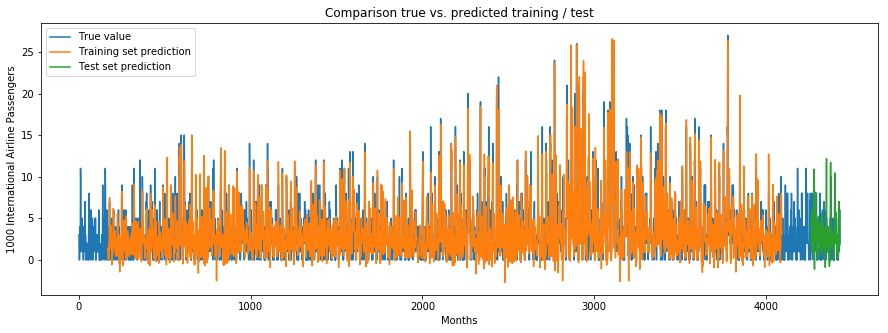

In [291]:
# Start with training predictions.
train_predict_plot = np.empty_like(dataset)
train_predict_plot[:, :] = np.nan
train_predict_plot[window_size:len(train_predict) + window_size, :] = train_predict

# Add test predictions.
test_predict_plot = np.empty_like(dataset)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict) + (window_size * 2) + 1:len(dataset) - 1, :] = test_predict

# Create the plot.
plt.figure(figsize = (15, 5))
plt.plot(scaler.inverse_transform(dataset), label = "True value")
plt.plot(train_predict_plot, label = "Training set prediction")
plt.plot(test_predict_plot, label = "Test set prediction")
plt.xlabel("Months")
plt.ylabel("1000 International Airline Passengers")
plt.title("Comparison true vs. predicted training / test")
plt.legend()
plt.show()


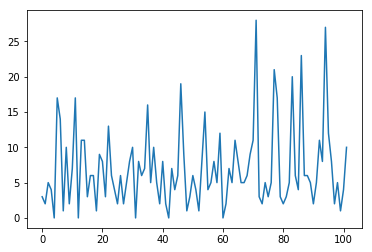

In [382]:
plt.plot(train[:102])

In [386]:
d = np.array(my_data['freq'])
train = d[:-168]
test = d[-168:]

In [366]:
import statsmodels.api as sm

In [387]:
mod = sm.tsa.statespace.SARIMAX(train, trend='n', order=(1,0,0), seasonal_order=(1, 1, 1, 25))
results = mod.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 4264
Model:             SARIMAX(1, 0, 0)x(1, 1, 1, 25)   Log Likelihood              -14742.828
Date:                            Sun, 24 Feb 2019   AIC                          29493.656
Time:                                    05:25:16   BIC                          29519.065
Sample:                                         0   HQIC                         29502.636
                                           - 4264                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2919      0.012     24.822      0.000       0.269       0.315
ar.S.L25      -0.0919      0.013     -6.855      0.000      -0.118      -0.066
ma.S.L25      -0.9818      0.004   -248.016      0.000      -0.990      -0.974
sigma2        60.1742      0.699     86.085      0.000      58.804      61.544
===================================================================================
Ljung-Box (Q):                     1932.20   Jarque-Bera (JB):              9265.22
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.39   Skew:                             1.86
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [406]:
len(train)+len(test)

4432

In [ ]:
from sklearn.metrics import mean_squared_error
pred = arimax_.predict(tr_end,te_end,exog = exog_test)[1:]
print('ARIMAX model MSE:{}'.format(mean_squared_error(tes,pred)))



C:\Users\Admin\Miniconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Admin\Miniconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:1740: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  ' effect.', ValueWarning)


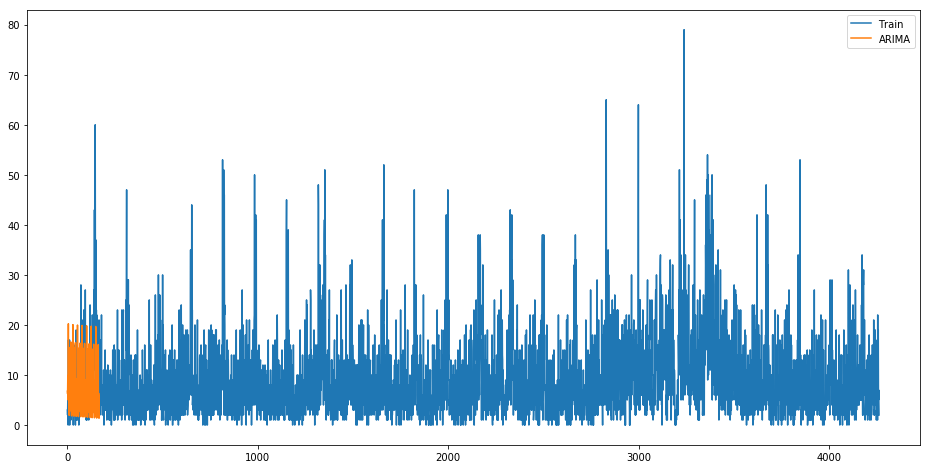

In [412]:
fit1 = sm.tsa.statespace.SARIMAX(train, order=(6, 1, 3),seasonal_order = (1,1,1,24)).fit()
y_hat_avg = fit1.predict(start=4265, end=4432, dynamic=True)
plt.figure(figsize=(16,8))
plt.plot( train, label='Train')
plt.plot(y_hat_avg, label='ARIMA')
plt.legend(loc='best')
plt.show()

In [401]:
train

array([3, 2, 5, ..., 7, 4, 2], dtype=int64)

In [402]:
y_hat_avg

array([4.31515363, 4.71229997, 4.63192774, 4.44129847, 4.55489289,
       4.58458709, 4.54575614, 4.54377274, 4.56382018, 4.56174377,
       4.55841739, 4.5629717 , 4.5663439 , 4.56690908, 4.5687038 ,
       4.57119552, 4.57307284, 4.57483529, 4.57686059, 4.57886016,
       4.58076934, 4.58271032, 4.58467728, 4.5866257 , 4.58856917,
       4.59052076, 4.59247217, 4.59442059, 4.59636984, 4.59831999,
       4.6002696 , 4.60221901, 4.60416868, 4.60611835, 4.60806793,
       4.61001753, 4.61196716, 4.61391677, 4.61586638, 4.61781599,
       4.61976561, 4.62171522, 4.62366483, 4.62561445, 4.62756406,
       4.62951367, 4.63146329, 4.6334129 , 4.63536251, 4.63731212,
       4.63926174, 4.64121135, 4.64316096, 4.64511058, 4.64706019,
       4.6490098 , 4.65095942, 4.65290903, 4.65485864, 4.65680826,
       4.65875787, 4.66070748, 4.66265709, 4.66460671, 4.66655632,
       4.66850593, 4.67045555, 4.67240516, 4.67435477, 4.67630439,
       4.678254  , 4.68020361, 4.68215322, 4.68410284, 4.68605

In [413]:
from sklearn.metrics import mean_squared_error
print('ARIMAX model MSE:{}'.format(mean_squared_error(test,y_hat_avg)))


ARIMAX model MSE:73.86572924892187


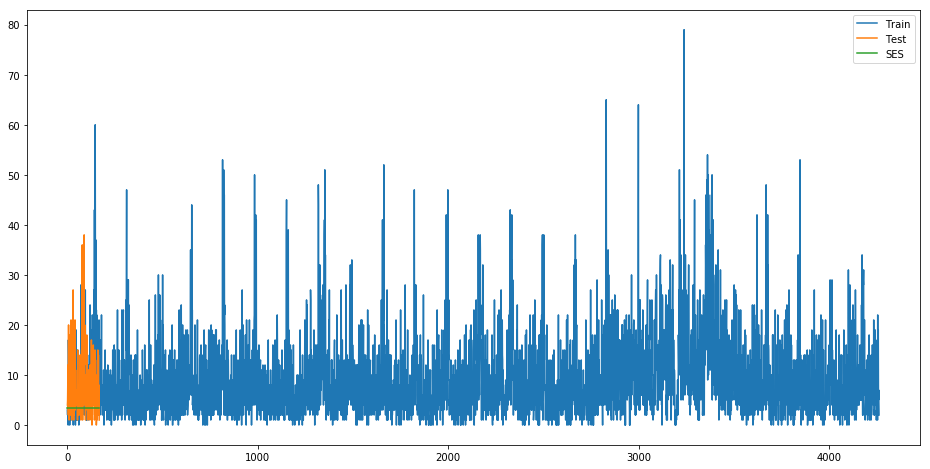

In [415]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_avg = test.copy()
fit2 = SimpleExpSmoothing(np.asarray(train)).fit(smoothing_level=0.6,optimized=False)
y_hat_avg = fit2.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(y_hat_avg, label='SES')
plt.legend(loc='best')
plt.show()


In [417]:
train

array([3, 2, 5, ..., 7, 4, 2], dtype=int64)